In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [ ]:
training = 'sample_data/mnist_digits_train.csv'
testing = 'sample_data/mnist_digits_test.csv'
train_df = pd.read_csv(training)
test_df = pd.read_csv(testing)

# convert to array
training = np.array(train_df,dtype = 'float32')
testing  = np.array(test_df,dtype = 'float32')

print(training.shape)
print(testing.shape)

(19999, 785)
(9999, 785)


Checking if data is properly loaded

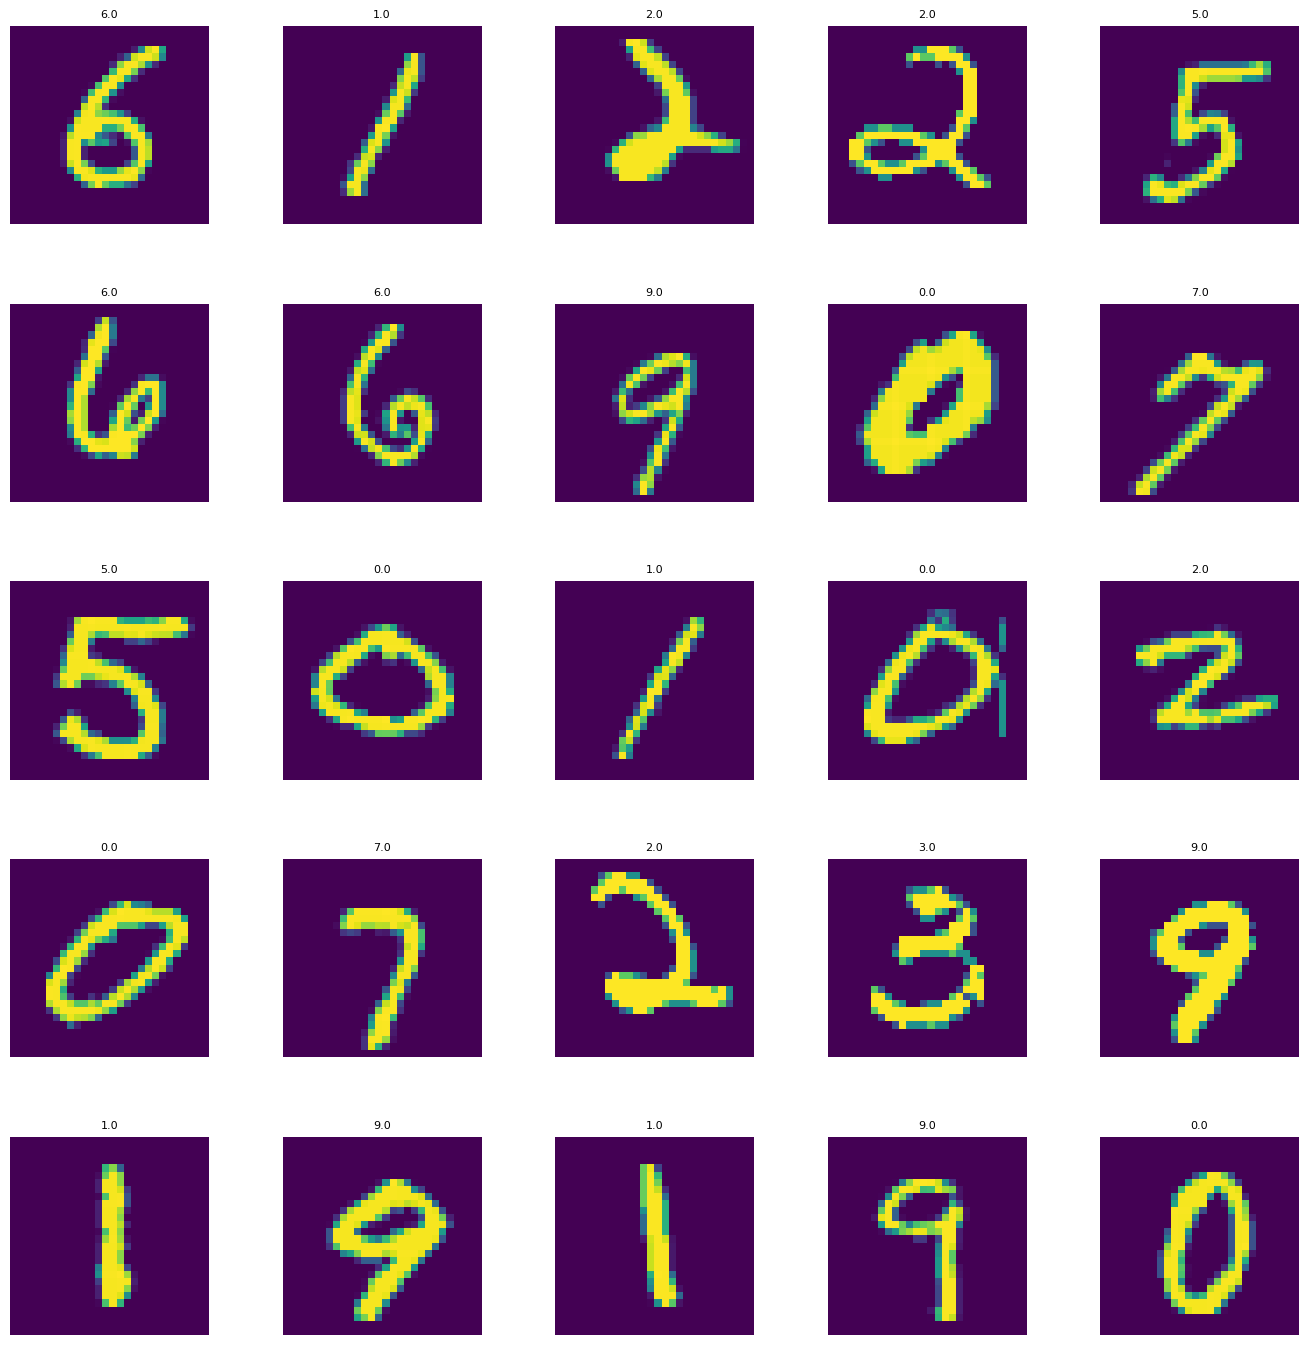

In [ ]:
width  = 5
height = 5

fig,axis = plt.subplots(height,width,figsize = (17,17))
axis = axis.ravel()
n_training = len(training)

for i in range(0,width*height):
  index = np.random.randint(0,n_training)
  label = training[index,0]
  axis[i].imshow(training[index,1:].reshape((28,28)))
  axis[i].set_title(label,fontsize = 8)
  axis[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Split the dependent and independent variables of the dataset

In [ ]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

#generate validation dataset
X_train, X_validate,y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

#convert data to CNN acceptable data
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [ ]:
#developing a CNN model

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 10
batch = 1000
model.fit(X_train,y_train,epochs=epochs , batch_size = batch,validation_data=(X_validate,y_validate))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 976ms/step - accuracy: 0.9844 - loss: 0.0481 - val_accuracy: 0.9780 - val_loss: 0.0786
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 966ms/step - accuracy: 0.9874 - loss: 0.0388 - val_accuracy: 0.9797 - val_loss: 0.0701
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 967ms/step - accuracy: 0.9874 - loss: 0.0393 - val_accuracy: 0.9783 - val_loss: 0.0761
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 961ms/step - accuracy: 0.9877 - loss: 0.0376 - val_accuracy: 0.9812 - val_loss: 0.0657
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 962ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9805 - val_loss: 0.0615
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 962ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9800 - val_loss: 0.0638
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 970ms/step - accuracy: 0.9913 - loss: 0.0304 - val_accuracy: 0.9822 - val_loss: 0.0604
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 958ms/step - accuracy: 0.9908 - loss: 0.0294 - val_accu

In [ ]:
predicted_class = model.predict(X_test)
model.evaluate(X_test,y_test,batch_size=batch)
predicted_class = np.argmax(predicted_class, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9808 - loss: 0.0585


Using test data to check for predictions

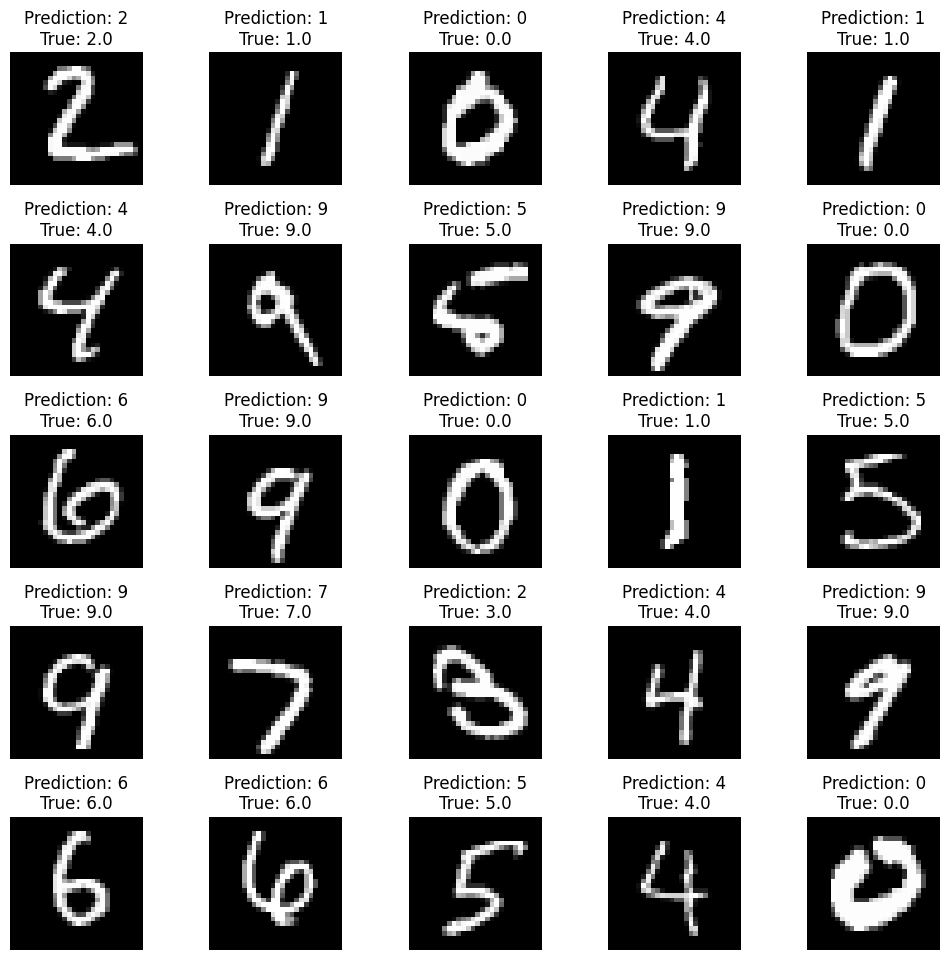

In [ ]:
L = 5
W = 5

# Ensure the number of images to plot does not exceed X_test
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

num_images = min(L * W, X_test.shape[0])

for i in range(num_images):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Prediction: {predicted_class[i]}\nTrue: {y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()
